In [2]:
import scipy.io
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import find_peaks
import matplotlib.pyplot as plt
%matplotlib inline
from openpyxl import load_workbook

/home/user/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [4]:
ECG = pd.read_csv('/home/user/conferences03/BIDMC PPG and Respiration Dataset/ZGJ_ECG .txt',names=['ECG'])
ECG

,ECG
0,1667
1,1667
2,1667
3,1667
4,1667
...,...
30795,1677
30796,1675
30797,1677
30798,1680


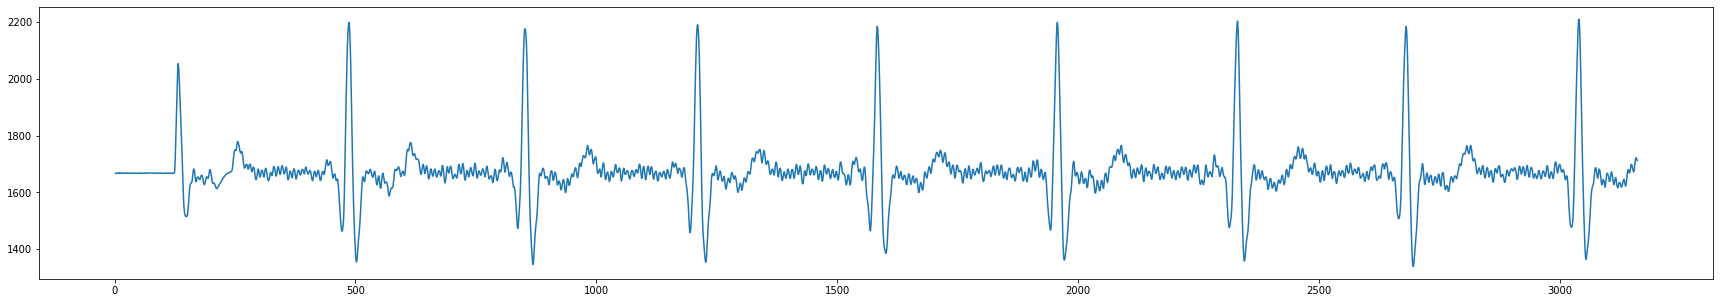

In [5]:
plt.figure(figsize=(30,5))
plt.plot(ECG[2:3162])
plt.show()

In [6]:
PPG = pd.read_csv('/home/user/conferences03/BIDMC PPG and Respiration Dataset/ZGJ_PPG.txt',names=['q','G','a','PPG'])
PPG

,q,G,a,PPG
0,1705,1657,1659,0
1,1672,1655,1658,83995
2,1676,1655,1658,150433
3,1674,1655,1659,216208
4,1667,1655,1658,281782
...,...,...,...,...
31175,1646,1655,1658,338246
31176,1660,1657,1658,338310
31177,1674,1656,1658,338523
31178,1676,1656,1658,338709


In [31]:
PPG = PPG['PPG']
PPG =  pd.DataFrame(PPG[10:31620])
PPG

,PPG
20,379661
21,379347
22,379065
23,378780
24,378479
...,...
31175,338246
31176,338310
31177,338523
31178,338709


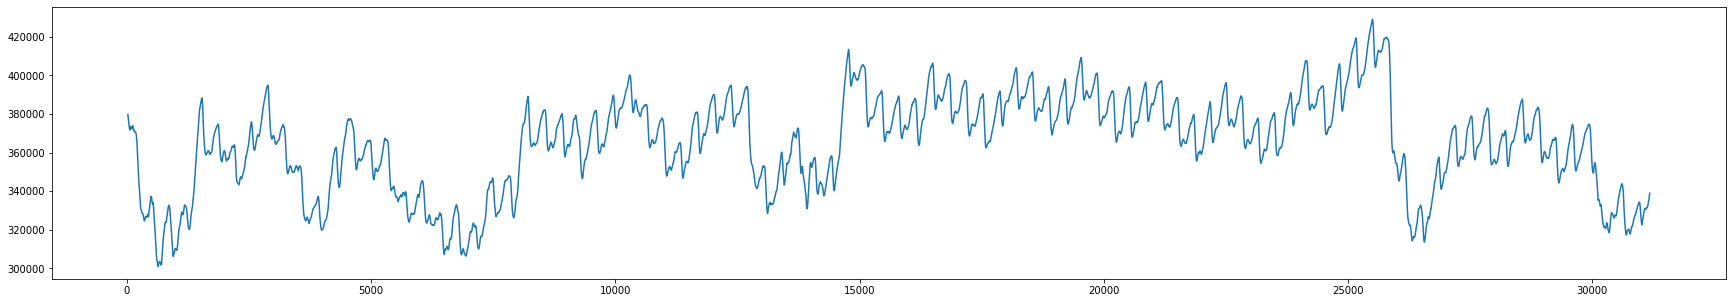

In [32]:
plt.figure(figsize=(30,5))
plt.plot(PPG[0:31620])
plt.show()

In [33]:
from scipy.signal import resample

# Assuming you have PPG and ECG signals as numpy arrays
# Replace these with your actual signals
ppg_signal = PPG.values
ecg_signal = ECG.values

# Define the original and target sampling rates
original_sampling_rate = 300  # Hz
target_sampling_rate = 125  # Hz

# Calculate the resampling factor
resampling_factor = original_sampling_rate / target_sampling_rate

# Calculate the number of samples in the resampled signal
num_samples_resampled = int(len(ppg_signal) / resampling_factor)

# Resample the PPG and ECG signals
resampled_ppg = resample(ppg_signal, num_samples_resampled)
resampled_ecg = resample(ecg_signal, num_samples_resampled)

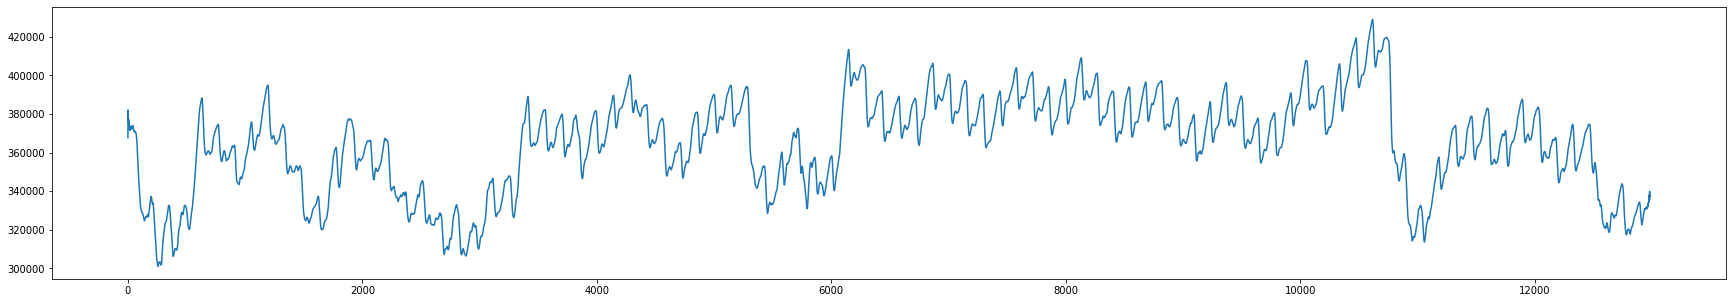

In [34]:
plt.figure(figsize=(30,5))
plt.plot(resampled_ppg)
plt.show()

In [35]:
chunk_size = 250

# Calculate the number of chunks
num_chunks = len(resampled_ppg) // chunk_size

# Split the signals into chunks
ppg_chunks = np.split(resampled_ppg[:num_chunks * chunk_size], num_chunks)
ecg_chunks = np.split(resampled_ecg[:num_chunks * chunk_size], num_chunks)


In [36]:
ppg_chunks

[array([[367734.0049888 ],
        [381989.75188836],
        [376612.84320337],
        [378900.82962108],
        [376382.9653855 ],
        [377427.63176308],
        [375678.39703876],
        [376261.59765729],
        [374832.88543602],
        [375038.26518171],
        [373698.32874009],
        [373820.07287396],
        [372736.88215202],
        [372798.32296802],
        [371876.11041951],
        [372055.7235252 ],
        [371465.44011716],
        [371930.37999454],
        [371889.94369223],
        [372638.66087154],
        [372652.73264345],
        [373296.78153596],
        [373227.44549196],
        [373619.38980759],
        [373327.7909665 ],
        [373579.22098447],
        [373151.59295942],
        [373211.25588249],
        [372737.77432415],
        [372841.50818282],
        [372435.7793825 ],
        [372583.50299965],
        [372307.75861632],
        [372530.24050442],
        [372418.45949672],
        [372768.43675743],
        [372830.25488417],
 

In [37]:
len(ecg_chunks)

51

In [38]:
ecg_chunks

[array([[1672.49049984],
        [1665.493244  ],
        [1667.867417  ],
        [1666.83386464],
        [1668.54537514],
        [1666.9989842 ],
        [1667.86249212],
        [1667.82821116],
        [1667.54644902],
        [1666.663605  ],
        [1667.67277138],
        [1667.25461061],
        [1668.07894253],
        [1667.27970914],
        [1666.98236803],
        [1667.29261378],
        [1667.39154699],
        [1667.27164851],
        [1667.39085195],
        [1666.84159733],
        [1667.23072808],
        [1667.67238753],
        [1667.24855148],
        [1667.61230421],
        [1666.95489814],
        [1667.33580632],
        [1667.28821618],
        [1668.00836194],
        [1667.08749089],
        [1667.1730704 ],
        [1668.06040019],
        [1667.9752904 ],
        [1668.00352491],
        [1667.98646283],
        [1666.97958747],
        [1667.74605688],
        [1667.95460012],
        [1667.17092754],
        [1667.62538143],
        [1667.08549541],


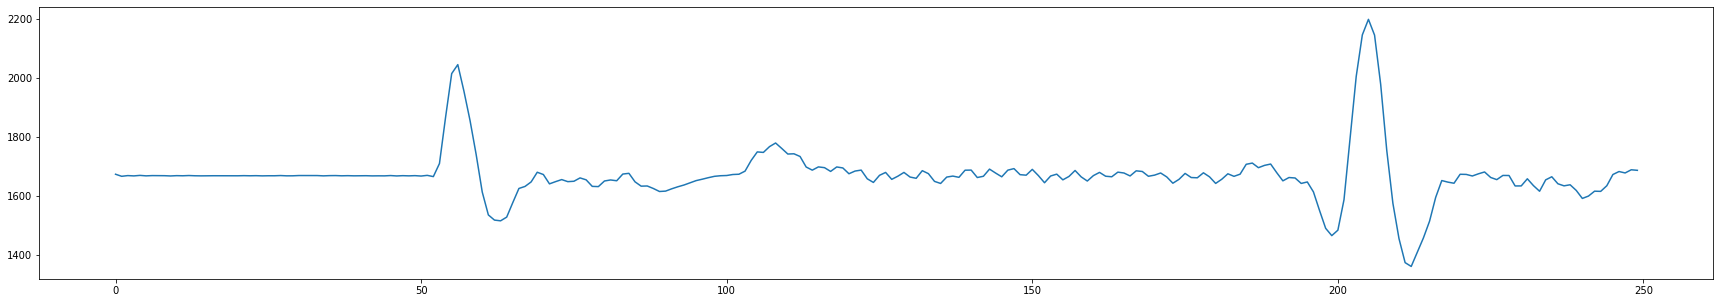

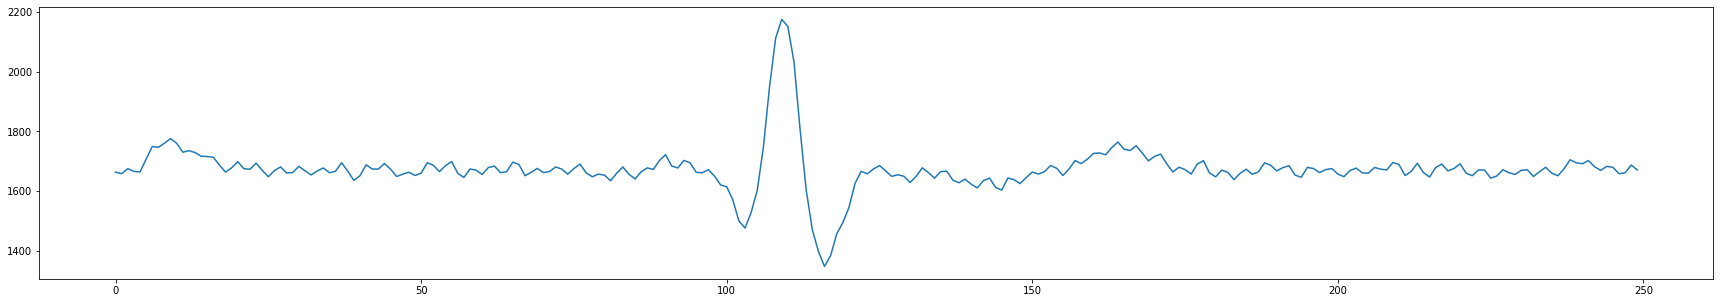

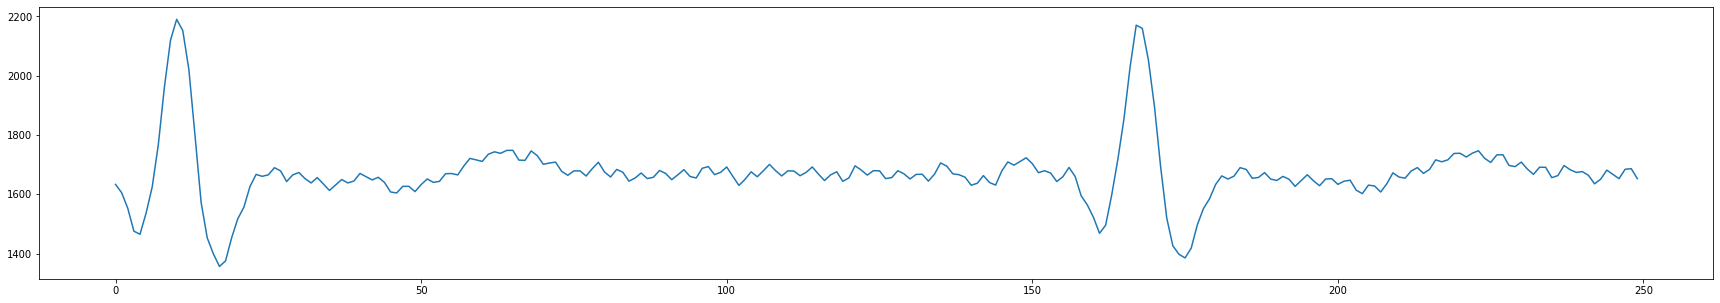

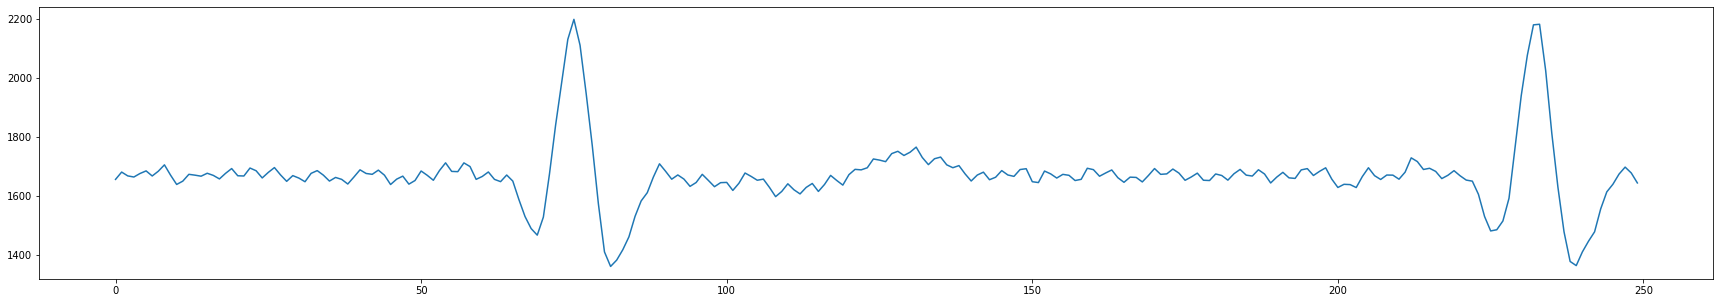

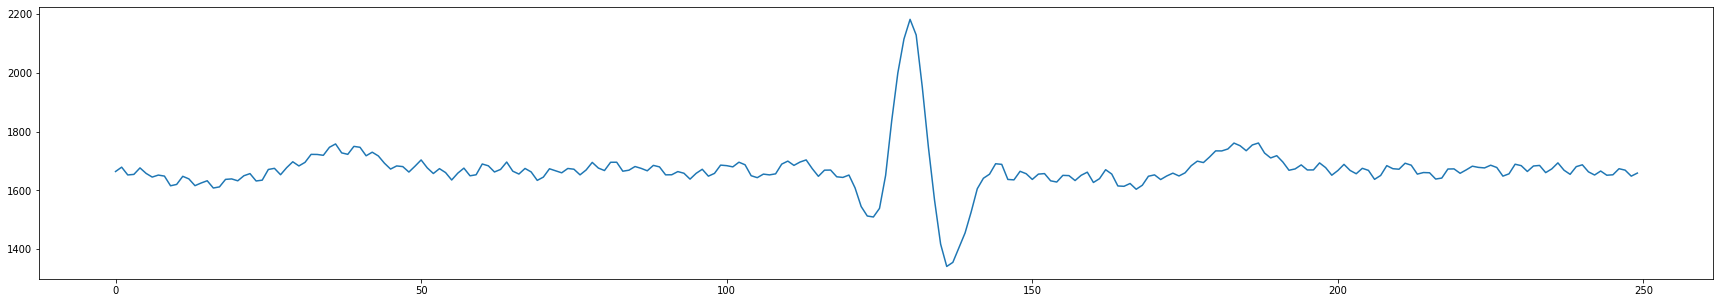

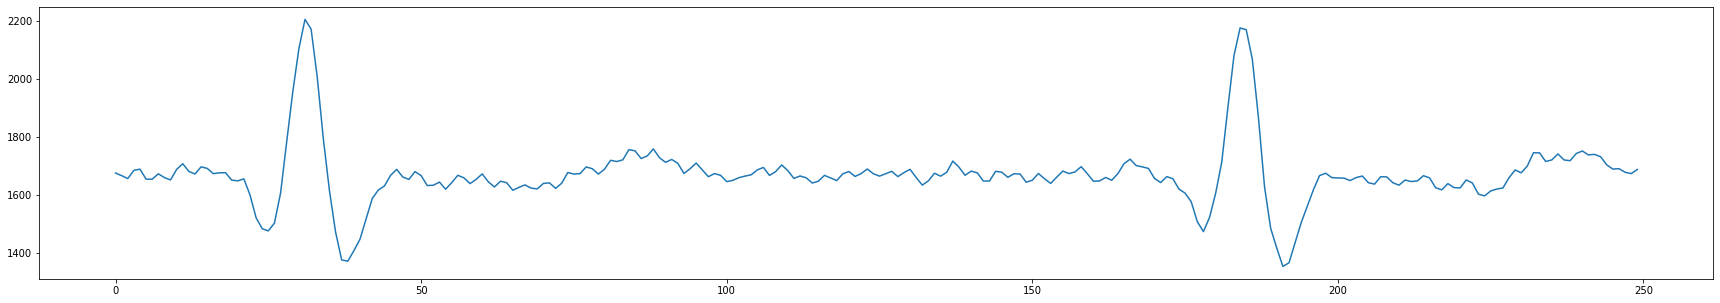

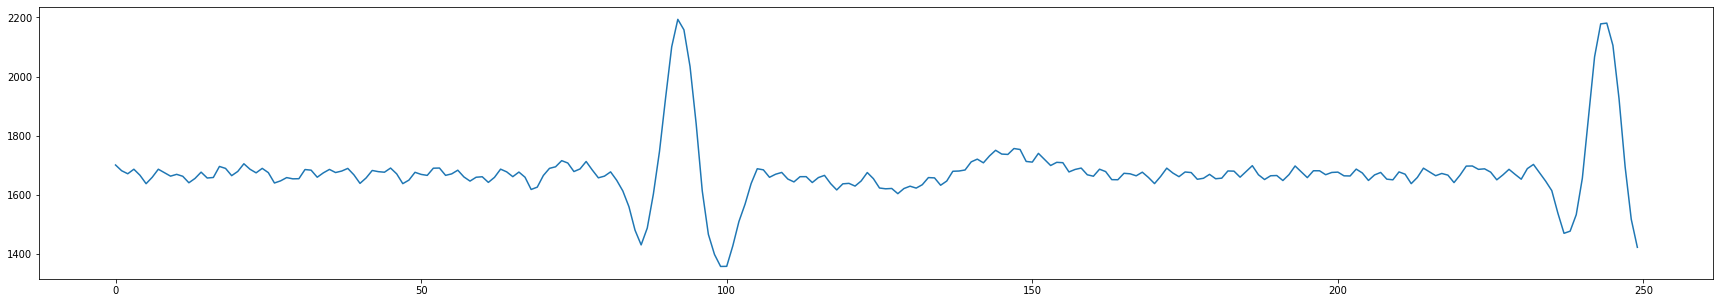

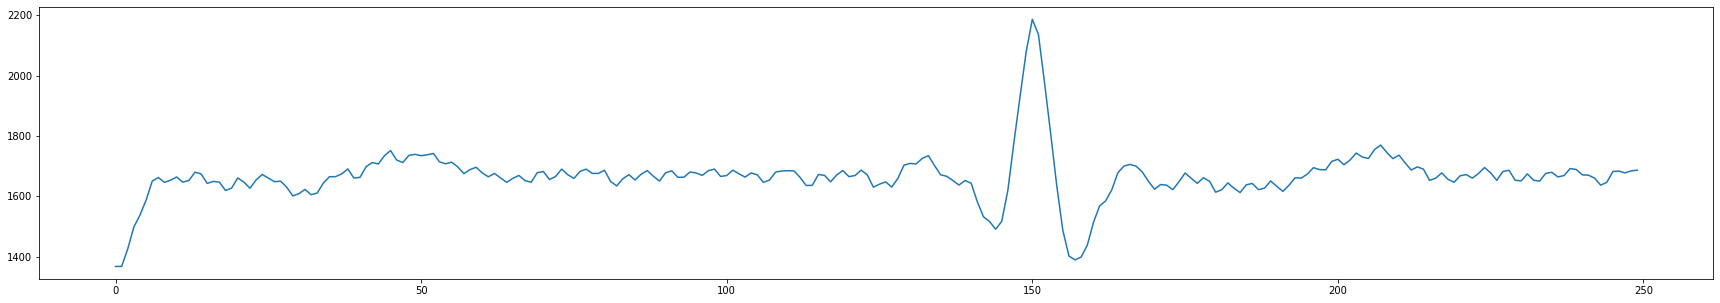

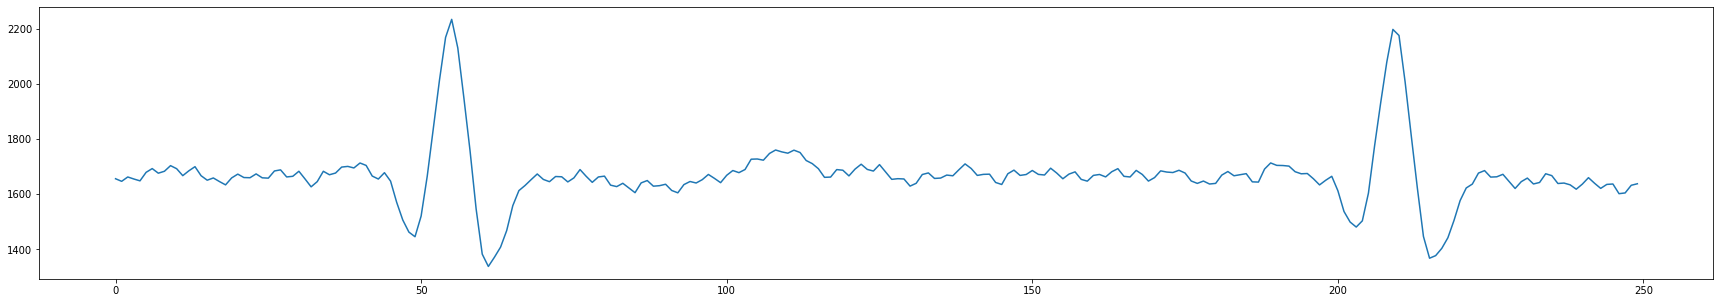

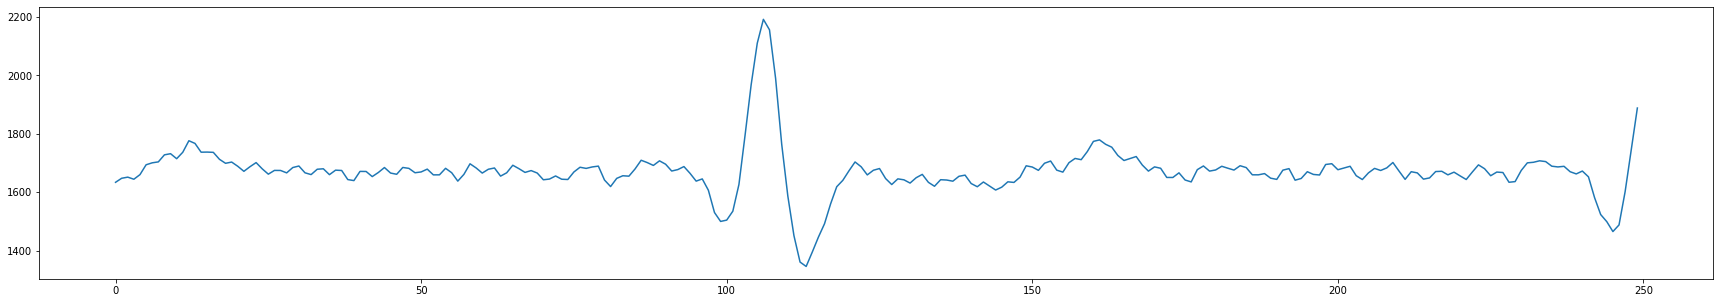

In [39]:
for i in range(0,10):
    plt.figure(figsize=(30,5))
    plt.plot(ecg_chunks[i])
    plt.show()

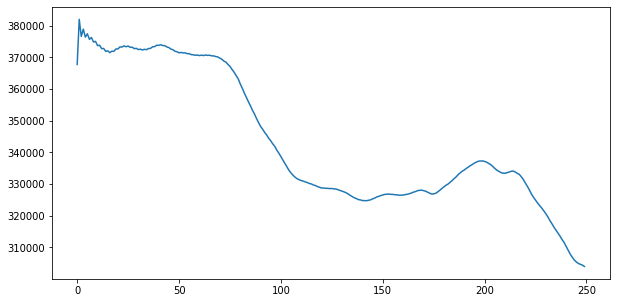

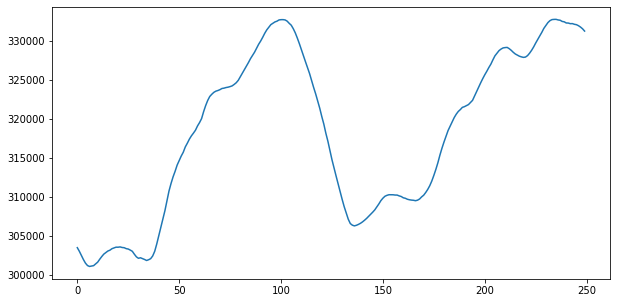

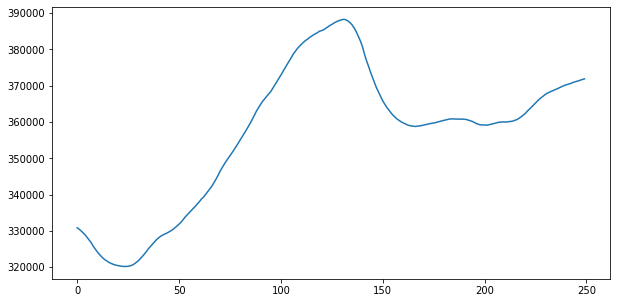

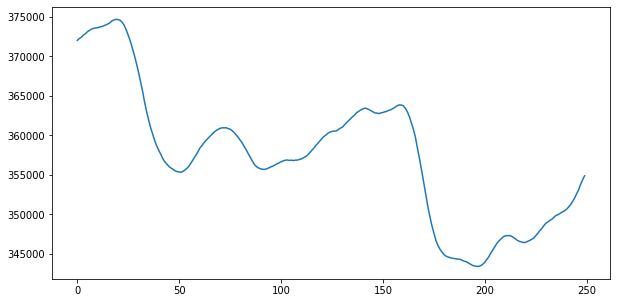

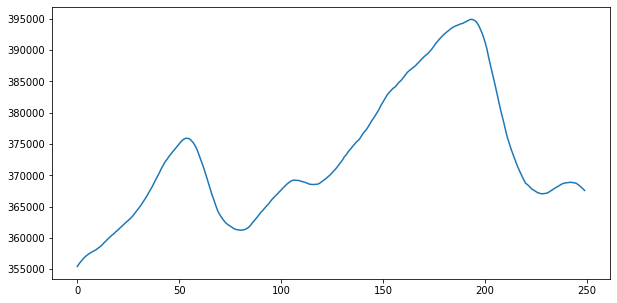

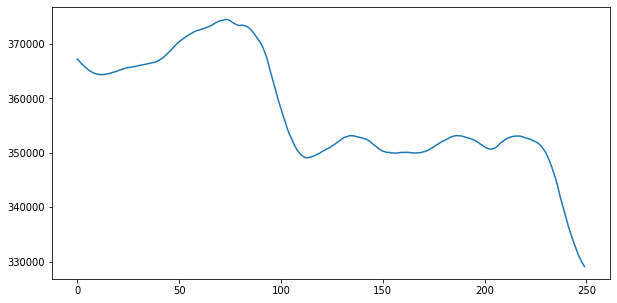

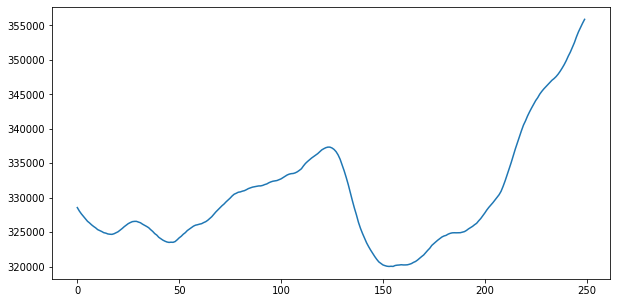

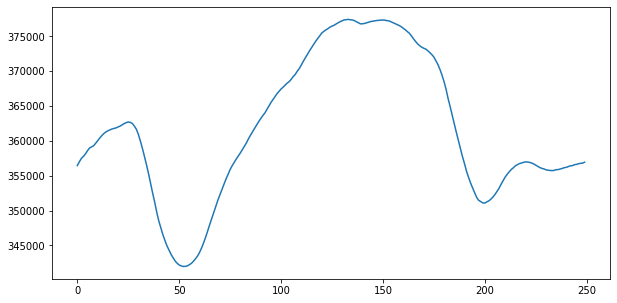

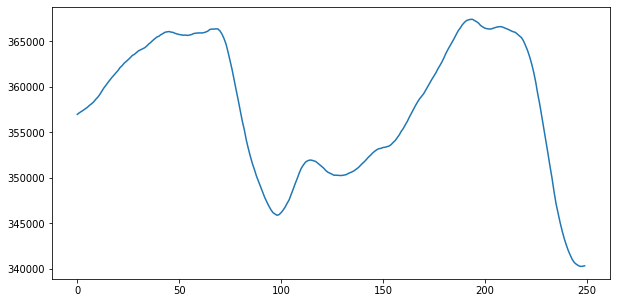

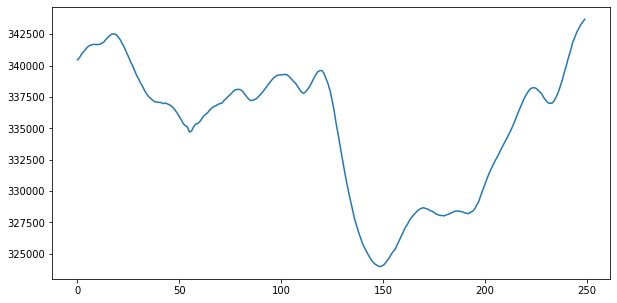

In [40]:
for i in range(0,10):
    plt.figure(figsize=(10,5))
    plt.plot(ppg_chunks[i])
    plt.show()

In [41]:
# ecg_data = np.array(ecg_chunks).reshape(32, 250)


In [42]:
# plt.plot(ecg_data[1])

In [43]:
import numpy as np
from scipy.signal import butter, lfilter

# Define the Butterworth bandpass filter function
def butter_bandpass_filter(data, lowcut, highcut, fs, order=2):
    nyquist = 0.5 * fs
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = butter(order, [low, high], btype='band')
    y = lfilter(b, a, data)
    return y

# Assuming you have PPG and ECG chunks
# Replace these with your actual chunks


# Define filter parameters
lowcut = 0.9  # Lower cutoff frequency in Hz
highcut = 10.0  # Upper cutoff frequency in Hz
fs = 125.0  # Sampling frequency in Hz
order = 2  # Filter order

# Apply the Butterworth bandpass filter to each PPG and ECG chunk
filtered_ppg_chunks = [butter_bandpass_filter(chunk, lowcut, highcut, fs, order) for chunk in ppg_chunks]
filtered_ecg_chunks = [butter_bandpass_filter(chunk, lowcut, highcut, fs, order) for chunk in ecg_chunks]


In [44]:
from sklearn.preprocessing import StandardScaler



# Initialize StandardScaler
scaler_ppg = StandardScaler()
scaler_ecg = StandardScaler()

# Reshape the chunks to 2D arrays (n_samples, n_features)
reshaped_ppg_chunks = np.array([chunk.flatten() for chunk in filtered_ppg_chunks])
reshaped_ecg_chunks = np.array([chunk.flatten() for chunk in filtered_ecg_chunks])

# Fit and transform the PPG data
scaled_ppg_chunks = scaler_ppg.fit_transform(reshaped_ppg_chunks)

# Fit and transform the ECG data
scaled_ecg_chunks = scaler_ecg.fit_transform(reshaped_ecg_chunks)

# Reshape the scaled data back to 3D arrays
scaled_ppg_chunks = [scaled_ppg_chunks[i].reshape(filtered_ppg_chunks[i].shape) for i in range(len(filtered_ppg_chunks))]
scaled_ecg_chunks = [scaled_ecg_chunks[i].reshape(filtered_ecg_chunks[i].shape) for i in range(len(filtered_ecg_chunks))]


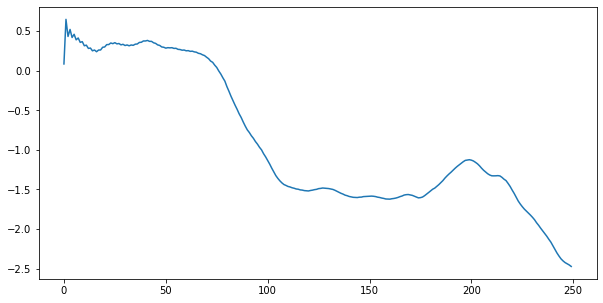

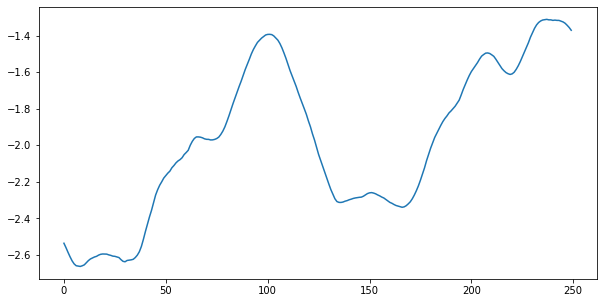

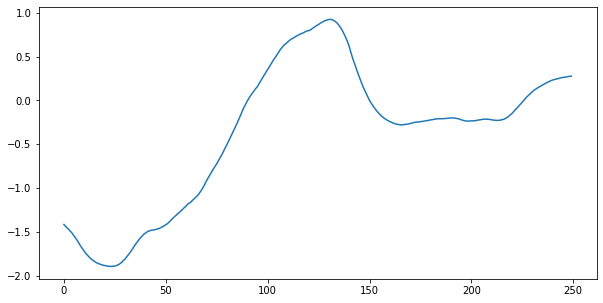

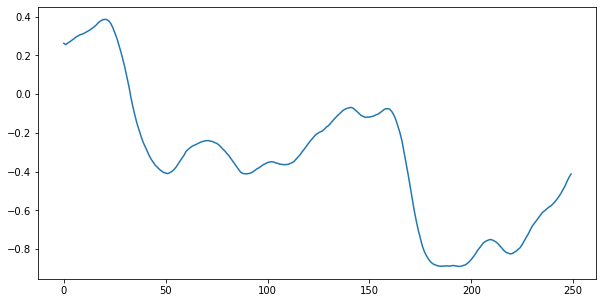

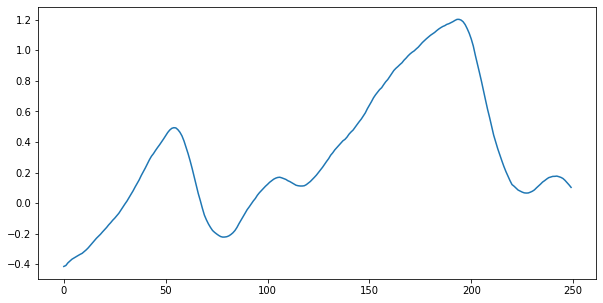

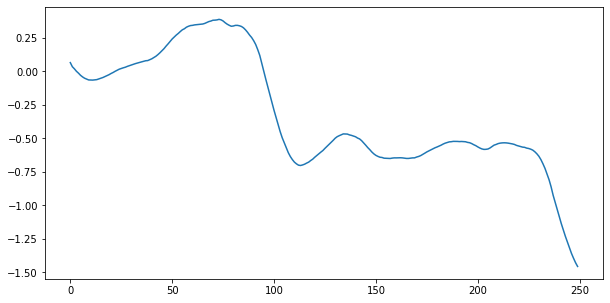

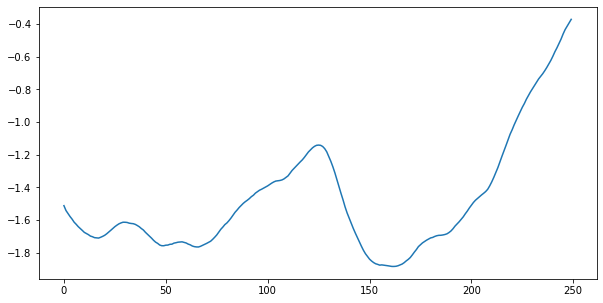

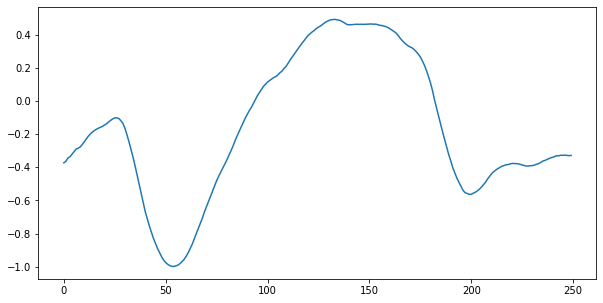

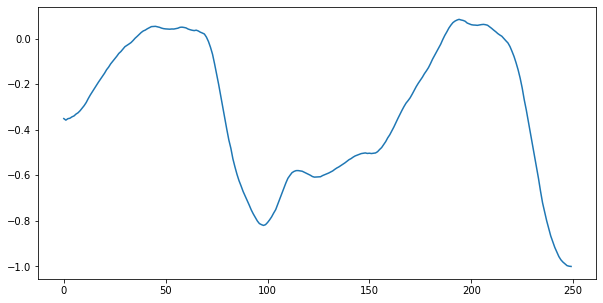

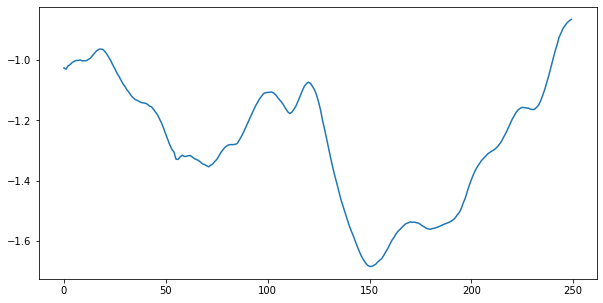

In [45]:
for i in range(0,10):
    plt.figure(figsize=(10,5))
    plt.plot(scaled_ppg_chunks[i])
    plt.show()

In [46]:
data_total = np.concatenate((scaled_ecg_chunks,scaled_ppg_chunks),axis=1)
data_total.shape

(51, 500, 1)

In [47]:
from keras import models    
model = models.load_model('/home/user/Reconstructed ABP waveform/Reviever01_100_20_64.h5')

2023-12-04 21:13:00.764472: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-12-04 21:13:00.766982: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2023-12-04 21:13:00.799709: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-04 21:13:00.799732: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-04 21:13:00.800679: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to

In [48]:
pre1, yhat1, yhat2  = model.predict(data_total)

2/2 [==============================] - 1s 40ms/step


In [51]:
SBP =[]
DBP = []

for i in range(0,51):

    max_value = max(pre1[i])
    min_value = min(pre1[i])
    
    DBP.append(min_value)
    SBP.append(max_value)

In [52]:
yhat1 = DBP
yhat2 = SBP

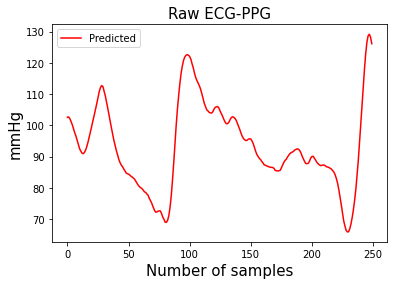

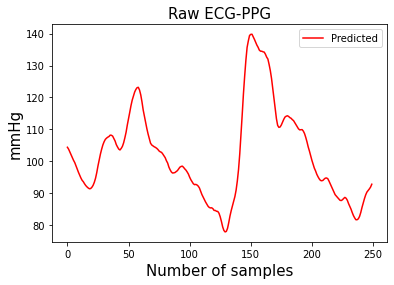

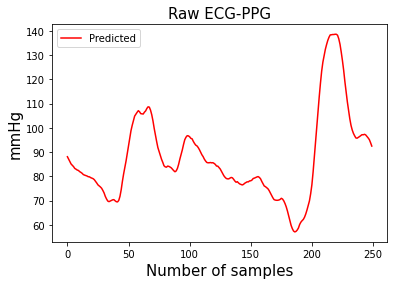

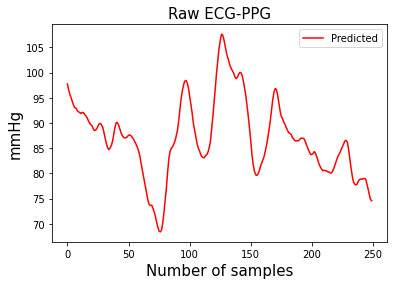

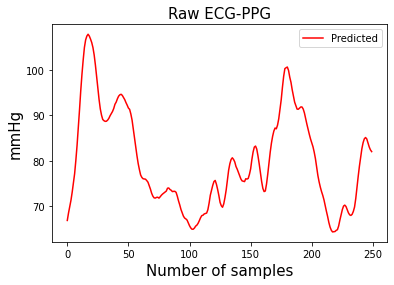

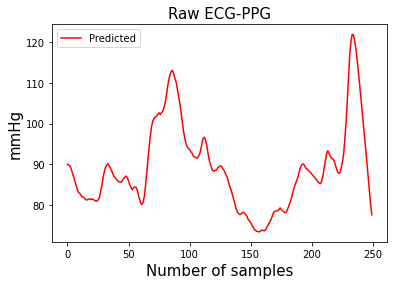

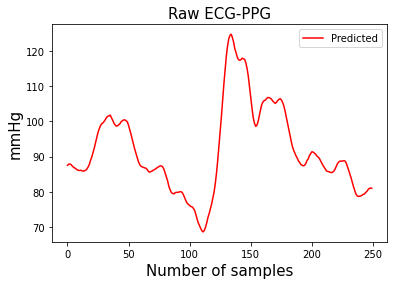

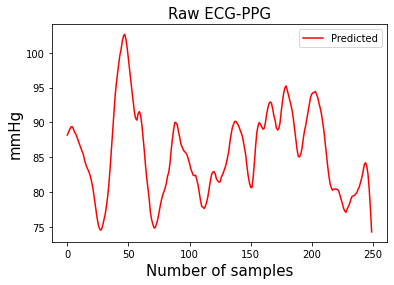

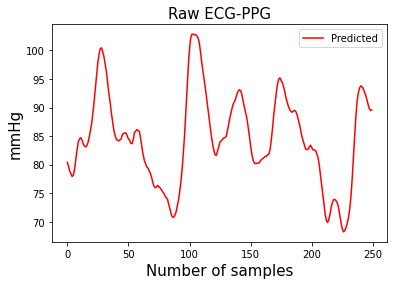

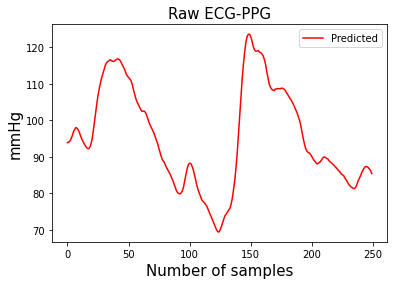

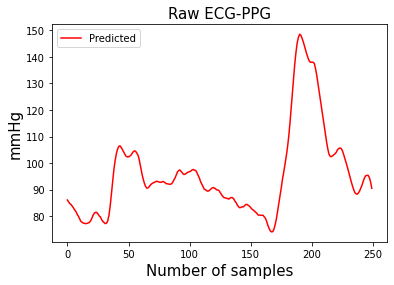

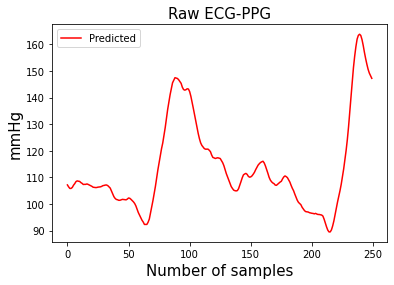

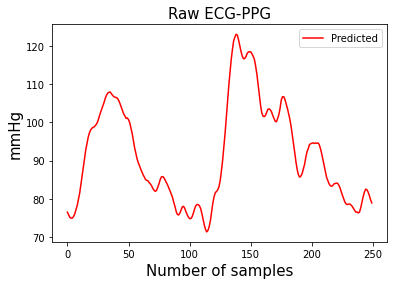

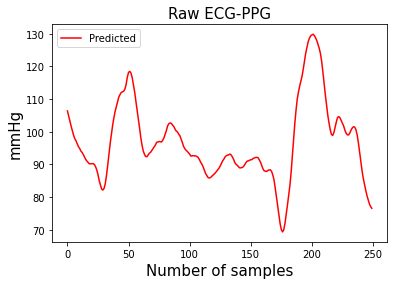

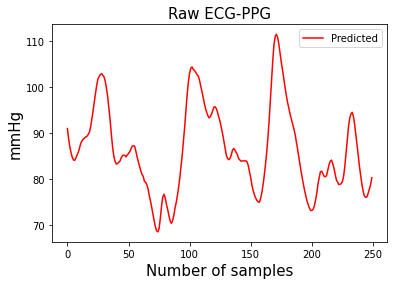

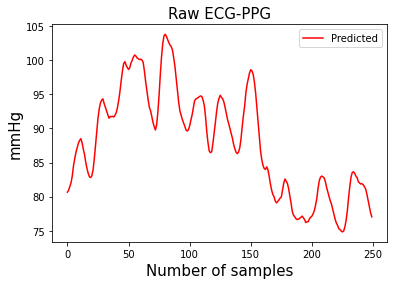

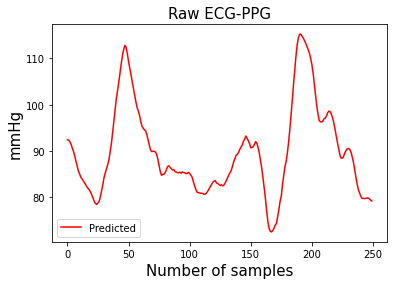

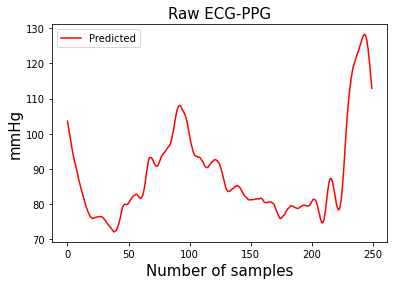

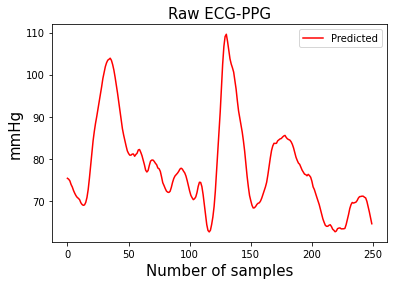

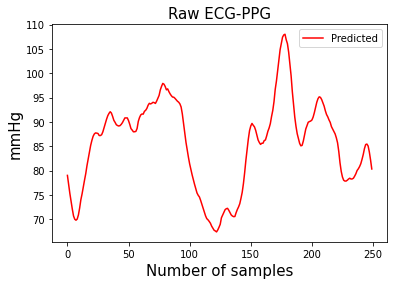

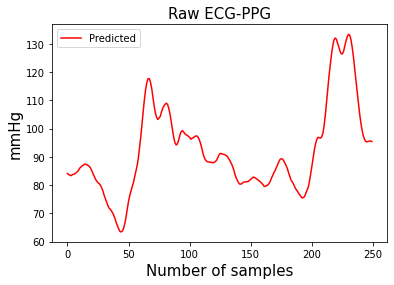

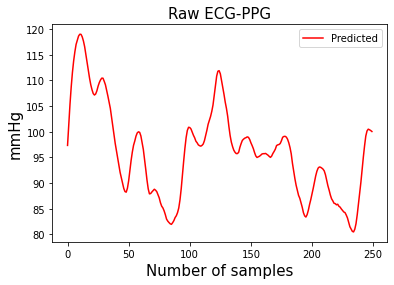

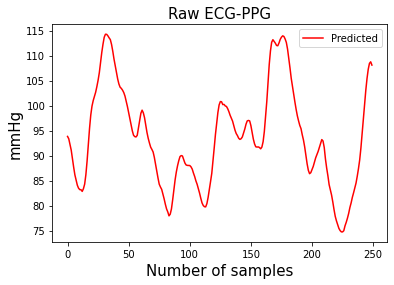

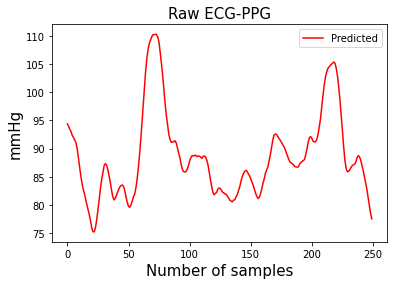

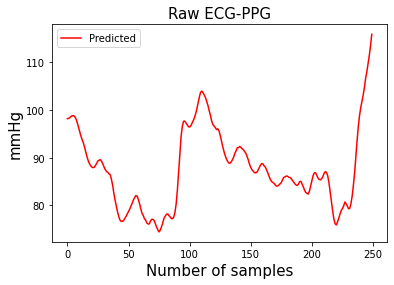

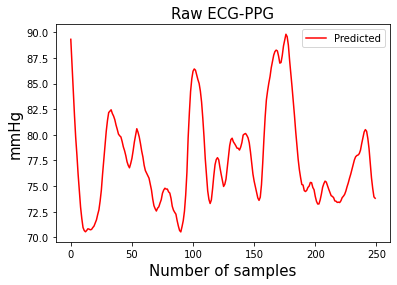

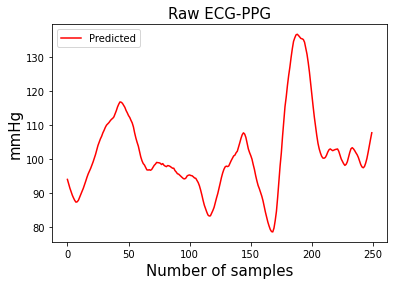

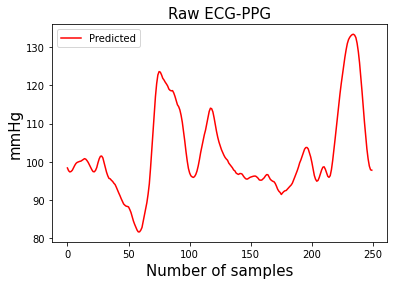

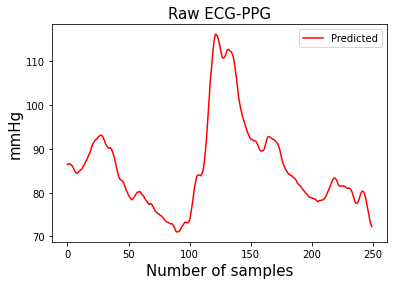

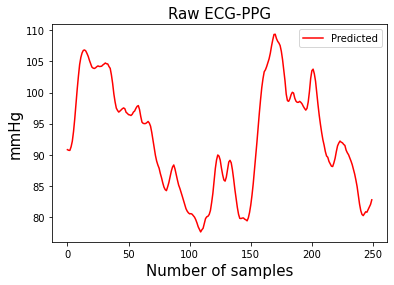

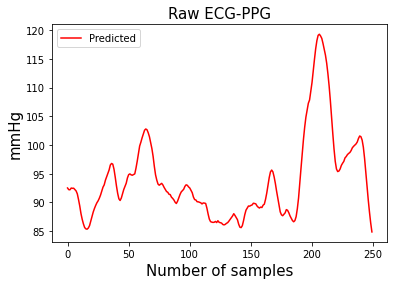

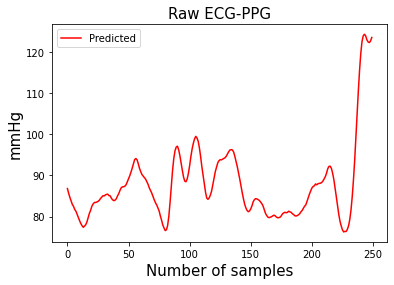

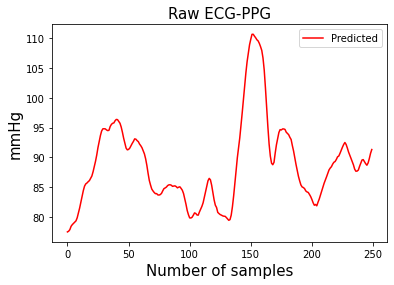

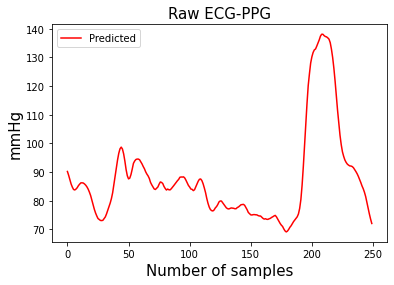

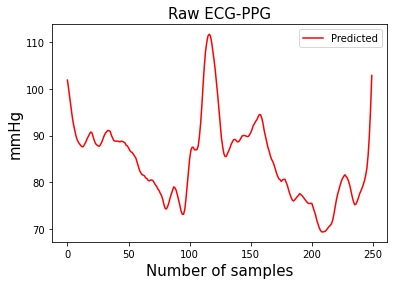

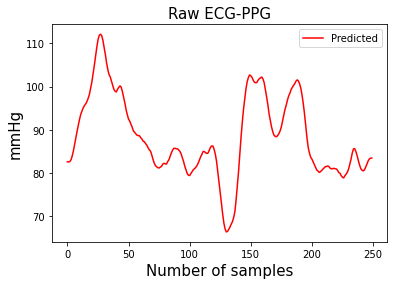

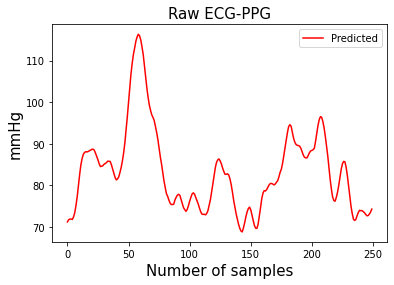

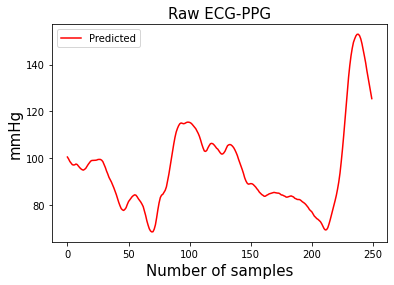

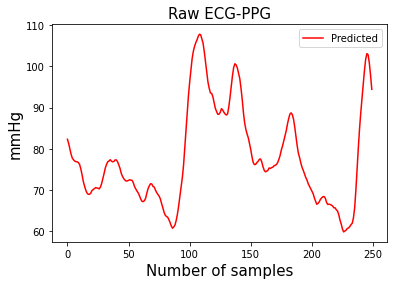

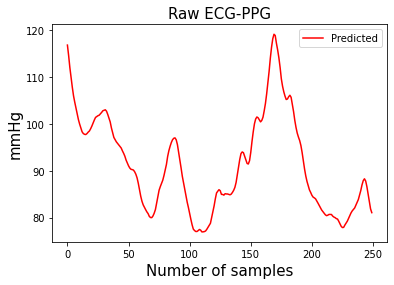

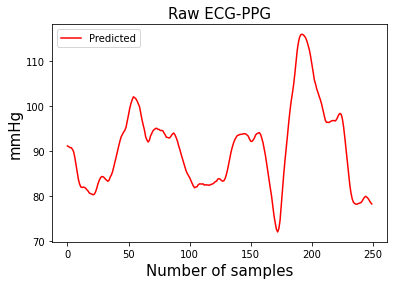

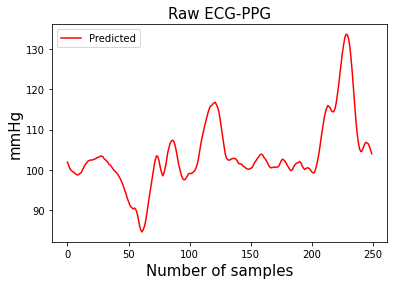

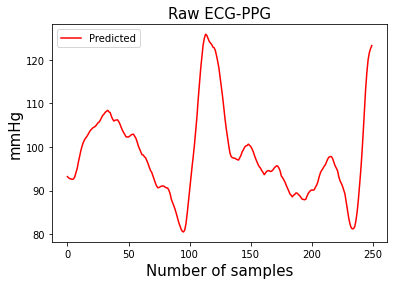

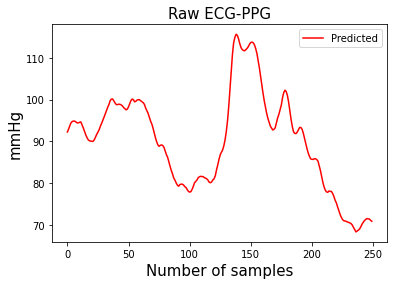

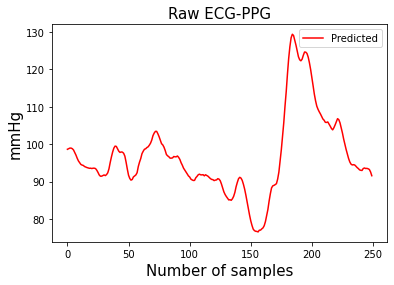

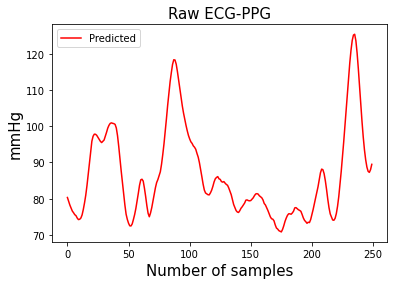

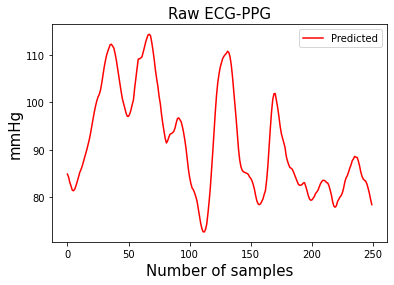

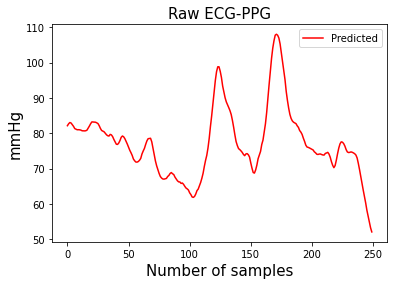

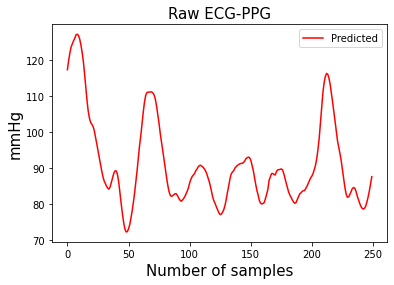

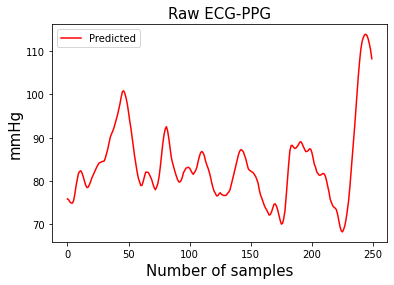

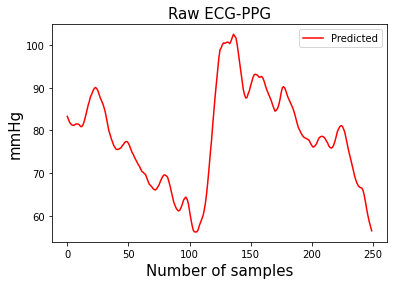

In [53]:
for i in range(0,len(pre1)):
    plt.title('Raw ECG-PPG',fontsize=15)
    # plt.plot(pre1[3],'r',label='True')
    plt.plot(pre1[i],'r', label='Predicted')
    plt.legend()
    plt.xlabel('Number of samples',fontsize=15)
    plt.ylabel('mmHg',fontsize=15)
    plt.show()
    

In [54]:
yhat1

[65.90378,
 77.88902,
 57.073517,
 68.39408,
 64.39228,
 73.43853,
 68.613205,
 74.295784,
 68.2078,
 69.406845,
 74.05655,
 89.51124,
 71.32494,
 69.37026,
 68.495514,
 74.82833,
 72.520485,
 72.05887,
 62.594585,
 67.415825,
 63.437614,
 80.47199,
 74.72476,
 75.18676,
 74.44241,
 70.53227,
 78.590965,
 81.58933,
 71.04592,
 77.59712,
 84.87015,
 76.28634,
 77.44868,
 69.15398,
 69.35552,
 66.323006,
 68.80279,
 68.511604,
 59.898014,
 76.95318,
 72.1129,
 84.557655,
 80.499146,
 68.26435,
 76.54248,
 70.8171,
 72.64234,
 52.09037,
 72.332726,
 68.19412,
 56.23729]

In [94]:

y_valid = np.random.randint(76,80,(51,1))

z_valid = np.random.randint(109,115,(51,1))

In [95]:
yhat1

[65.90378,
 77.88902,
 57.073517,
 68.39408,
 64.39228,
 73.43853,
 68.613205,
 74.295784,
 68.2078,
 69.406845,
 74.05655,
 89.51124,
 71.32494,
 69.37026,
 68.495514,
 74.82833,
 72.520485,
 72.05887,
 62.594585,
 67.415825,
 63.437614,
 80.47199,
 74.72476,
 75.18676,
 74.44241,
 70.53227,
 78.590965,
 81.58933,
 71.04592,
 77.59712,
 84.87015,
 76.28634,
 77.44868,
 69.15398,
 69.35552,
 66.323006,
 68.80279,
 68.511604,
 59.898014,
 76.95318,
 72.1129,
 84.557655,
 80.499146,
 68.26435,
 76.54248,
 70.8171,
 72.64234,
 52.09037,
 72.332726,
 68.19412,
 56.23729]

In [96]:
yhat2

[129.14673,
 139.79417,
 138.5505,
 107.60639,
 107.80778,
 121.884705,
 124.77913,
 102.640945,
 102.83126,
 123.56034,
 148.53885,
 163.83844,
 123.06819,
 129.82474,
 111.405525,
 103.818184,
 115.214485,
 128.32072,
 109.601036,
 108.01453,
 133.40303,
 119.01887,
 114.26853,
 110.32058,
 115.89181,
 89.81657,
 136.72614,
 133.39005,
 116.16457,
 109.36449,
 119.27026,
 124.3252,
 110.68202,
 138.06403,
 111.73095,
 112.11612,
 116.34017,
 152.98055,
 107.728264,
 119.09308,
 115.9635,
 133.73355,
 125.88176,
 115.68425,
 129.41338,
 125.432755,
 114.40687,
 108.041756,
 127.15099,
 113.93514,
 102.550964]

In [97]:

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error, r2_score

In [98]:
print('R²: ', r2_score(y_valid, yhat1))
print('MAE: ', mean_absolute_error(y_valid, yhat1))
print('RMSE: ', mean_squared_error(y_valid, yhat1, squared=False))


R²:  -67.28828241678293
MAE:  7.4210339714499085
RMSE:  9.085402818511236


In [99]:
#DBP
print('R²: ', r2_score(z_valid, yhat2))
print('MAE: ', mean_absolute_error(z_valid, yhat2))
print('RMSE: ', mean_squared_error(z_valid, yhat2, squared=False))


R²:  -88.1130354738141
MAE:  12.150325101964613
RMSE:  16.757198625775462


In [100]:
import seaborn as sns
sns.set()

In [101]:
BPclass = np.zeros(4)
def classify_BP( prediction):

    if (prediction < 5):
        BPclass[0] += 1
    elif (prediction < 10):
        BPclass[1] += 1
    elif (prediction < 15):
        BPclass[2] += 1
    else:
        BPclass[3] += 1

def compute(yTest,yPred):
    # Split dataset into training set and test set in case use the same data for trainning and test
    import math
    Test = []
    Pred = []
    
    band = []
    for i in yTest:
        Test.append(i)
    for i in yPred:
        Pred.append(i)

    # print("list:",Test)
    # print("list:%.2f", Pred)
    erro, std = 0, []
    for i in range(0, yPred.shape[0]):
        # print("yPred: %.3f"%(Pred[i]), "| yTest: %.3f" %(Test[i])," | Erro: %.3f" %(np.abs(Pred[i] - Test[i])))
        # time.sleep(1)
        erro += abs(Pred[i] - Test[i])
        std.append(abs(Pred[i] - Test[i]))
        classify_BP(abs(Pred[i] - Test[i]))
        band.append(Pred[i] - Test[i])
        
        
        
        
        
    fig = plt.figure(figsize=(15, 4), dpi=120)
    ax1 = plt.subplot(1, 3, 1)
#     ax2 = ax1.twinx()
    sns.distplot(band, bins=100, kde=False, rug=False, ax=ax1)
#     sns.distplot(band, bins=100, kde=False, rug=False, ax=ax2)
#     ax2.set_yticklabels(['0 \%', '10 \%', '14.67 \%',
#                      '22.01 \%', '29.35 \%', '36.68 \%', '44.02 \%'])
    ax1.set_xlabel('Error (mmHg)', fontsize=14)
    ax1.set_ylabel('Number of Samples', fontsize=14)
#     ax2.set_ylabel('Percentage of Samples', fontsize=14)
    plt.title('Error in DBP Prediction', fontsize=18)
    plt.xlim(xmax=30.0, xmin=-30.0)
    #plt.xticks(np.arange(0, 60+1, 5))
    plt.tight_layout()


    print("Number of test: %d" % (sum(BPclass)))
    print("Mean Error: %.3f" % (erro / yPred.shape[0]))
    print("Standar Deviation NP: %.3f" % (np.std(std)))
    print("Classe 5mmHg: %d " % (BPclass[0]), "-> %.2f" % (BPclass[0] / (sum(BPclass)) * 100), "%")
    print("Classe 10mmHg: %d " % (BPclass[1]), "-> %.2f" % (BPclass[1] / (sum(BPclass)) * 100), "%",
          " %.2f" % ((BPclass[0] + BPclass[1]) / (sum(BPclass)) * 100), "%")
    print("Classe 15mmHg: %d " % (BPclass[2]), "-> %.2f" % (BPclass[2] / (sum(BPclass)) * 100), "%",
          " %.2f" % ((BPclass[0] + BPclass[1] + BPclass[2]) / (sum(BPclass)) * 100), "%")
    print("Classe >15mmHg: %d " % (BPclass[3]), "-> %.2f" % (BPclass[3] / (sum(BPclass)) * 100), "%")
    # print(" ------- END OF ANALYSIS ------")


In [102]:
def compute1(yTest,yPred):
    # Split dataset into training set and test set in case use the same data for trainning and test
    import math
    Test = []
    Pred = []
    
    band = []
    for i in yTest:
        Test.append(i)
    for i in yPred:
        Pred.append(i)

    # print("list:",Test)
    # print("list:%.2f", Pred)
    erro, std = 0, []
    for i in range(0, yPred.shape[0]):
        # print("yPred: %.3f"%(Pred[i]), "| yTest: %.3f" %(Test[i])," | Erro: %.3f" %(np.abs(Pred[i] - Test[i])))
        # time.sleep(1)
        erro += abs(Pred[i] - Test[i])
        std.append(abs(Pred[i] - Test[i]))
        classify_BP(abs(Pred[i] - Test[i]))
        band.append(Pred[i] - Test[i])
        
        
        
        
        
    fig = plt.figure(figsize=(15, 4), dpi=120)
    ax1 = plt.subplot(1, 3, 1)
#     ax2 = ax1.twinx()
    sns.distplot(band, bins=100, kde=False, rug=False, ax=ax1)
#     sns.distplot(band, bins=100, kde=False, rug=False, ax=ax2)
#     ax2.set_yticklabels(['0 \%', '10 \%', '14.67 \%',
#                      '22.01 \%', '29.35 \%', '36.68 \%', '44.02 \%'])
    ax1.set_xlabel('Error (mmHg)', fontsize=14)
    ax1.set_ylabel('Number of Samples', fontsize=14)
#     ax2.set_ylabel('Percentage of Samples', fontsize=14)
    plt.title('Error in DBP Prediction', fontsize=18)
    plt.xlim(xmax=30.0, xmin=-30.0)
    #plt.xticks(np.arange(0, 60+1, 5))
    plt.tight_layout()


    print("Number of test: %d" % (sum(BPclass)))
    print("Mean Error: %.3f" % (erro / yPred.shape[0]))
    print("Standar Deviation NP: %.3f" % (np.std(std)))
    print("Classe 5mmHg: %d " % (BPclass[0]), "-> %.2f" % (BPclass[0] / (sum(BPclass)) * 100), "%")
    print("Classe 10mmHg: %d " % (BPclass[1]), "-> %.2f" % (BPclass[1] / (sum(BPclass)) * 100), "%",
          " %.2f" % ((BPclass[0] + BPclass[1]) / (sum(BPclass)) * 100), "%")
    print("Classe 15mmHg: %d " % (BPclass[2]), "-> %.2f" % (BPclass[2] / (sum(BPclass)) * 100), "%",
          " %.2f" % ((BPclass[0] + BPclass[1] + BPclass[2]) / (sum(BPclass)) * 100), "%")
    print("Classe >15mmHg: %d " % (BPclass[3]), "-> %.2f" % (BPclass[3] / (sum(BPclass)) * 100), "%")
    # print(" ------- END OF ANALYSIS ------")


/home/user/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/tmp/ipykernel_60276/2706596311.py:57: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("Mean Error: %.3f" % (erro / yPred.shape[0]))


Number of test: 51
Mean Error: 12.150
Standar Deviation NP: 11.540
Classe 5mmHg: 18  -> 35.29 %
Classe 10mmHg: 9  -> 17.65 %  52.94 %
Classe 15mmHg: 9  -> 17.65 %  70.59 %
Classe >15mmHg: 15  -> 29.41 %


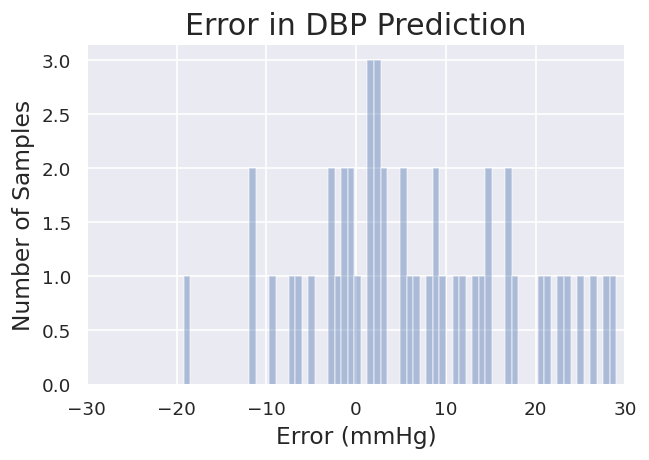

In [103]:
compute(z_valid, np.array(yhat2))

Number of test: 102
Mean Error: 7.421
Standar Deviation NP: 5.241
Classe 5mmHg: 40  -> 39.22 %
Classe 10mmHg: 25  -> 24.51 %  63.73 %
Classe 15mmHg: 17  -> 16.67 %  80.39 %
Classe >15mmHg: 20  -> 19.61 %


/tmp/ipykernel_60276/3475154761.py:45: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("Mean Error: %.3f" % (erro / yPred.shape[0]))


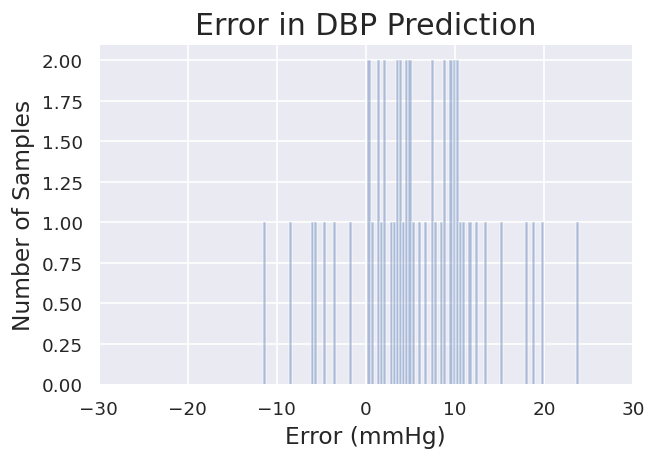

In [104]:
 compute1(yhat1, np.array(y_valid))

In [114]:
yhat1

[65.90378,
 77.88902,
 57.073517,
 68.39408,
 64.39228,
 73.43853,
 68.613205,
 74.295784,
 68.2078,
 69.406845,
 74.05655,
 89.51124,
 71.32494,
 69.37026,
 68.495514,
 74.82833,
 72.520485,
 72.05887,
 62.594585,
 67.415825,
 63.437614,
 80.47199,
 74.72476,
 75.18676,
 74.44241,
 70.53227,
 78.590965,
 81.58933,
 71.04592,
 77.59712,
 84.87015,
 76.28634,
 77.44868,
 69.15398,
 69.35552,
 66.323006,
 68.80279,
 68.511604,
 59.898014,
 76.95318,
 72.1129,
 84.557655,
 80.499146,
 68.26435,
 76.54248,
 70.8171,
 72.64234,
 52.09037,
 72.332726,
 68.19412,
 56.23729]

In [105]:
y_valid  = pd.DataFrame(y_valid)
z_valid  = pd.DataFrame(z_valid)

In [106]:
def bland_altman_plot_SBP(data1, data2):
    data1     = np.asarray(data1)
    data2     = np.asarray(data2)
    mean      = np.mean([data1, data2], axis=1)
    diff      = data1 - data2                   # Difference between data1 and data2
    md        = np.mean(diff)                   # Mean of the difference
    sd        = np.std(diff, axis=0)            # Standard deviation of the difference

    print('md: ', md)
    print('sd: ', sd)
    
    with plt.style.context(('ggplot')):
        
        plt.rcParams['font.serif'] = ['Times New Roman']
        plt.rcParams.update({'font.size':800})
        

        plt.scatter(mean, diff,  c='k', edgecolors='lightgrey')
        plt.axhline(md, color='gray', linestyle='--', label=f'Mean Diff')
        plt.text(160, md , f'Mean Diff : { "%.4f" % md}', fontsize=15)

        plt.axhline(md + 1.96*sd, color='r', linestyle='--',label='+ 1.96*SD')
        plt.text(160, md + 1.96*sd, f'+ 1.96*SD : {"%.4f" % (md + 1.96*sd)}', fontsize=15)
        plt.ylim(-30,30)
        plt.xlim(60, 200)
#         plt.title(' Diastolic Blood Pressure', fontsize=17)
        plt.title(' Systolic Blood Pressure', fontsize=17)
        plt.xlabel('Average of Target and Estimate(mmHg)', fontsize=15)
        plt.ylabel('Error(mmHg)', fontsize=15)
        plt.axhline(md - 1.96*sd, color='r', linestyle='--',label='- 1.96*SD')
        plt.text(160, md - 1.96*sd, f'- 1.96*SD : {"%.4f" % (md - 1.96*sd)}', fontsize=15)

        plt.show()

In [110]:
Ypred1 = yhat1

Ytrue = z_valid
Ypred = yhat2

Ytrue1 = y_valid.values


In [111]:
from plot import evaluate_BP_Classification
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from mpl_toolkits.axes_grid1 import make_axes_locatable

# evaluate_BP_Classification(z_valid, yhat2, yhat1, y_valid)

In [112]:
Ypred1 = yhat1

Ypred1

[65.90378,
 77.88902,
 57.073517,
 68.39408,
 64.39228,
 73.43853,
 68.613205,
 74.295784,
 68.2078,
 69.406845,
 74.05655,
 89.51124,
 71.32494,
 69.37026,
 68.495514,
 74.82833,
 72.520485,
 72.05887,
 62.594585,
 67.415825,
 63.437614,
 80.47199,
 74.72476,
 75.18676,
 74.44241,
 70.53227,
 78.590965,
 81.58933,
 71.04592,
 77.59712,
 84.87015,
 76.28634,
 77.44868,
 69.15398,
 69.35552,
 66.323006,
 68.80279,
 68.511604,
 59.898014,
 76.95318,
 72.1129,
 84.557655,
 80.499146,
 68.26435,
 76.54248,
 70.8171,
 72.64234,
 52.09037,
 72.332726,
 68.19412,
 56.23729]

DBPS Classification Accuracy
                  precision    recall  f1-score   support

    Hypertension    1.00000   0.98039   0.99010        51
Pre-hypertension    0.00000   0.00000   0.00000         0

        accuracy                        0.98039        51
       macro avg    0.50000   0.49020   0.49505        51
    weighted avg    1.00000   0.98039   0.99010        51

SBPS Classification Accuracy
              precision    recall  f1-score   support

Normotension    1.00000   1.00000   1.00000        51

    accuracy                        1.00000        51
   macro avg    1.00000   1.00000   1.00000        51
weighted avg    1.00000   1.00000   1.00000        51



/home/user/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/user/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/user/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/tmp/ipykernel_60276/37167529.py:47: RuntimeWarning: invalid 

ValueError: The number of FixedLocator locations (1), usually from a call to set_ticks, does not match the number of ticklabels (3).

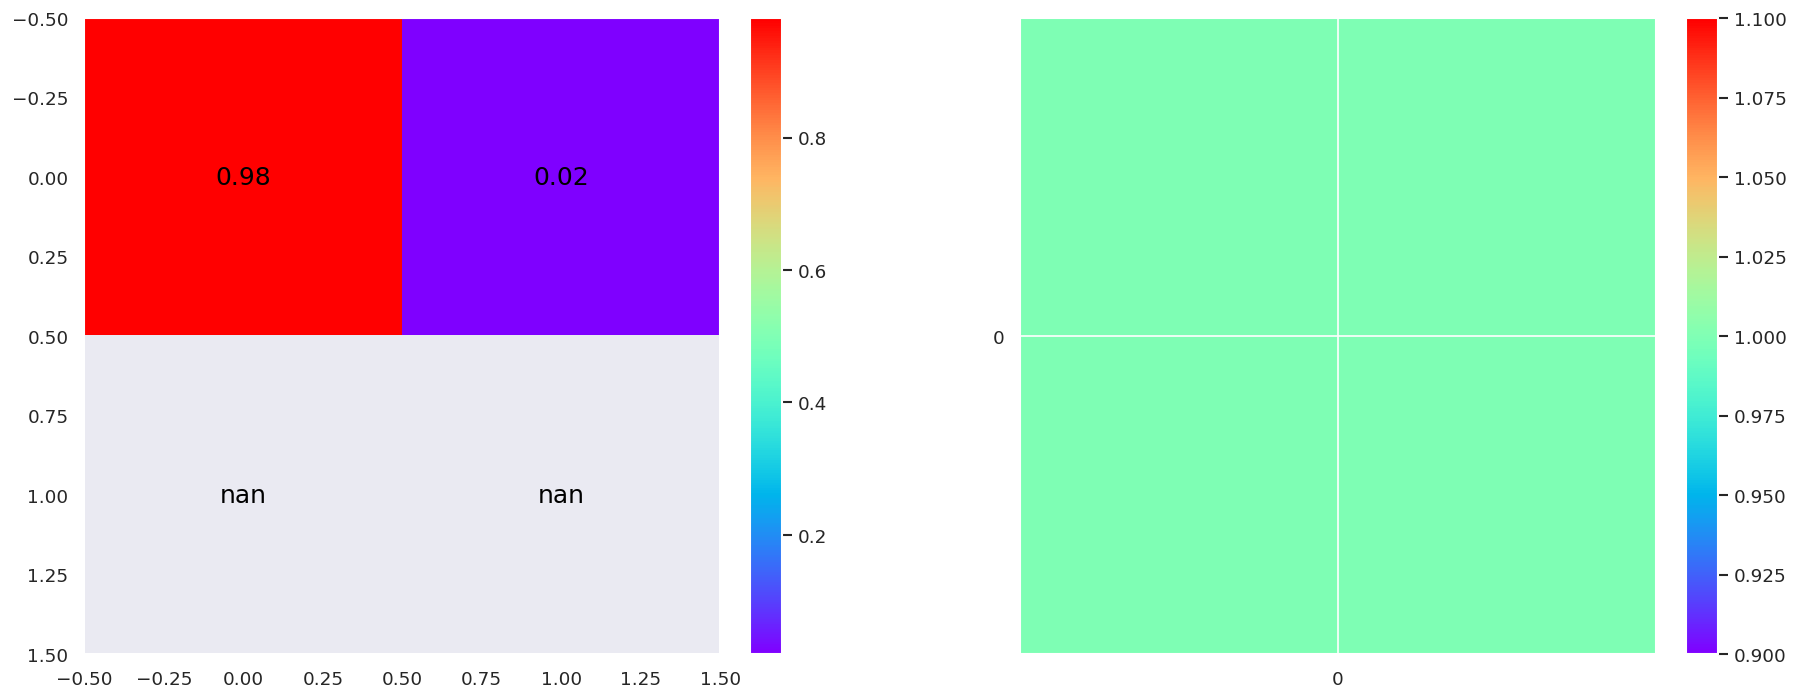

In [113]:
Ypred1 = yhat1

Ytrue = z_valid.values
Ypred = yhat2# loading prediction
#     Ytrue1 = y_valid.values
#     Ytrue1 = y_valid.values
#     Ypred1 = yhat1
Ytrue1 = y_valid.values

### DBPS ####

cls_gt = []
cls_pred = []

for i in (range(len(Ytrue))):
    dbp_gt = Ytrue[i].ravel()
    dbp_pred = Ypred[i].ravel()

    # 		dbp_gt = max_abp*min(y_t)+min_abp
    # 		dbp_pred = max_abp*min(y_p)+min_abp

    if (dbp_gt <= 80):
        cls_gt.append('Normotension')
    elif ((dbp_gt > 80) and (dbp_gt <= 90)).all():
        cls_gt.append('Pre-hypertension')
    elif (dbp_gt > 90).all():
        cls_gt.append('Hypertension')
    else:
        print('bump')  # this will never happen, check for error

    if (dbp_pred <= 80):
        cls_pred.append('Normotension')
    elif ((dbp_pred > 80) and (dbp_pred <= 90)):
        cls_pred.append('Pre-hypertension')
    elif (dbp_pred > 90):
        cls_pred.append('Hypertension')
    else:
        print('bump')  # this will never happen, check for error

print('DBPS Classification Accuracy')
print(classification_report(cls_gt, cls_pred, digits=5))
# print('-'*25)
# print(accuracy_score(cls_gt,cls_pred))

cm = confusion_matrix(cls_gt, cls_pred)
classes = ['Hypertension', 'Normotension', 'Prehypertension']
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
fig = plt.figure(figsize=(16, 6), dpi=120)
ax = plt.subplot(1, 2, 1)
im = ax.imshow(cm, interpolation='nearest', cmap="rainbow")  # draw confusion matrix

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.25)

ax.figure.colorbar(im, cax=cax)
# ax.set(xticks=np.arange(cm.shape[1]),
#        yticks=np.arange(cm.shape[0]),
#        xticklabels=classes, yticklabels=classes)

# ax.set_title('Blood Pressure Classification Accuracy Using DBP', fontsize=18)
# ax.set_ylabel('True label', fontsize=16)
# ax.set_xlabel('Predicted label', fontsize=16)

# plt.setp(ax.get_xticklabels(), rotation=45, fontsize=15, ha="right",
#          rotation_mode="anchor")

# plt.setp(ax.get_yticklabels(), fontsize=15)

fmt = '.2f'
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, format(cm[i, j], fmt),
                ha="center", va="center", fontsize=15,
                color="b" if cm[i, j] > thresh else "black")

ax.grid(False)

fig.tight_layout()


cls_gt = []
cls_pred = []

for i in (range(len(Ytrue))):
    sbp_gt = Ytrue1[i].ravel()
    sbp_pred = Ypred1[i].ravel()

    if (sbp_gt <= 120):
        cls_gt.append('Normotension')
    elif ((sbp_gt > 120) and (sbp_gt <= 140)):
        cls_gt.append('Prehypertension')
    elif (sbp_gt > 140):
        cls_gt.append('Hypertension')
    else:
        print('bump')  # this will never happen, check for error

    if (sbp_pred <= 120):
        cls_pred.append('Normotension')
    elif ((sbp_pred > 120) and (sbp_pred <= 140)):
        cls_pred.append('Prehypertension')
    elif (sbp_pred > 140):
        cls_pred.append('Hypertension')
    else:
        print('bump')  # this will never happen, check for error

print('SBPS Classification Accuracy')
print(classification_report(cls_gt, cls_pred, digits=5))
# print('-'*25)
# print(accuracy_score(cls_gt,cls_pred))

cm = confusion_matrix(cls_gt, cls_pred)
classes = ['Hypertension', 'Normotension', 'Prehypertension']
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

ax = plt.subplot(1, 2, 2)
im = ax.imshow(cm, interpolation='nearest', cmap="rainbow")  # draw confusion matrix

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.25)

ax.figure.colorbar(im, cax=cax)
ax.set(xticks=np.arange(cm.shape[1]),
       yticks=np.arange(cm.shape[0]),
       xticklabels=classes, yticklabels=classes)

ax.set_title('Blood Pressure Classification Accuracy Using SBP', fontsize=18)
ax.set_ylabel('True label', fontsize=16)
ax.set_xlabel('Predicted label', fontsize=16)

plt.setp(ax.get_xticklabels(), rotation=45, fontsize=15, ha="right",
         rotation_mode="anchor")

plt.setp(ax.get_yticklabels(), fontsize=15)

fmt = '.2f'
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, format(cm[i, j], fmt),
                ha="center", va="center", fontsize=15,
                color="b" if cm[i, j] > thresh else "black")

ax.grid(False)

fig.tight_layout()

plt.show()
